<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-базы-данных-сервиса-для-чтения-книг" data-toc-modified-id="Анализ-базы-данных-сервиса-для-чтения-книг-1">Анализ базы данных сервиса для чтения книг</a></span></li><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-2">Описание проекта</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-3">Загрузка данных</a></span></li><li><span><a href="#Количество-книг,-вышедших-после-1-января-2000-года;" data-toc-modified-id="Количество-книг,-вышедших-после-1-января-2000-года;-4">Количество книг, вышедших после 1 января 2000 года;</a></span></li><li><span><a href="#Количество-обзоров-и-средняя-оценка" data-toc-modified-id="Количество-обзоров-и-средняя-оценка-5">Количество обзоров и средняя оценка</a></span></li><li><span><a href="#Издательства,-выпустившее-наибольшее-число-книг-толще-50-страниц" data-toc-modified-id="Издательства,-выпустившее-наибольшее-число-книг-толще-50-страниц-6">Издательства, выпустившее наибольшее число книг толще 50 страниц</a></span></li><li><span><a href="#Автор-с-самой-высокой-средней-оценкой-книг" data-toc-modified-id="Автор-с-самой-высокой-средней-оценкой-книг-7">Автор с самой высокой средней оценкой книг</a></span></li><li><span><a href="#Cреднее-количество-обзоров-от-пользователей,-которые-поставили-больше-50-оценок" data-toc-modified-id="Cреднее-количество-обзоров-от-пользователей,-которые-поставили-больше-50-оценок-8">Cреднее количество обзоров от пользователей, которые поставили больше 50 оценок</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-9">Вывод</a></span></li></ul></div>

# Анализ базы данных сервиса для чтения книг

# Описание проекта

**Цель исследования:** 

Необходимо проанализировать базу данных крупного сервиса для чтения книг по подписке. В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

**Описание данных:**

Таблица `books` - cодержит данные о книгах:
* book_id — идентификатор книги;
* author_id — идентификатор автора;
* title — название книги;
* num_pages — количество страниц;
* publication_date — дата публикации книги;
* publisher_id — идентификатор издателя.

Таблица `authors` - cодержит данные об авторах:
* author_id — идентификатор автора;
* author — имя автора.

Таблица `publishers` - cодержит данные об издательствах:
* publisher_id — идентификатор издательства;
* publisher — название издательства;

Таблица `ratings` - cодержит данные о пользовательских оценках книг:
* rating_id — идентификатор оценки;
* book_id — идентификатор книги;
* username — имя пользователя, оставившего оценку;
* rating — оценка книги.

Таблица `reviews` - cодержит данные о пользовательских обзорах:
* review_id — идентификатор обзора;
* book_id — идентификатор книги;
* username — имя автора обзора;
* text — текст обзора.

**Схема данных:**
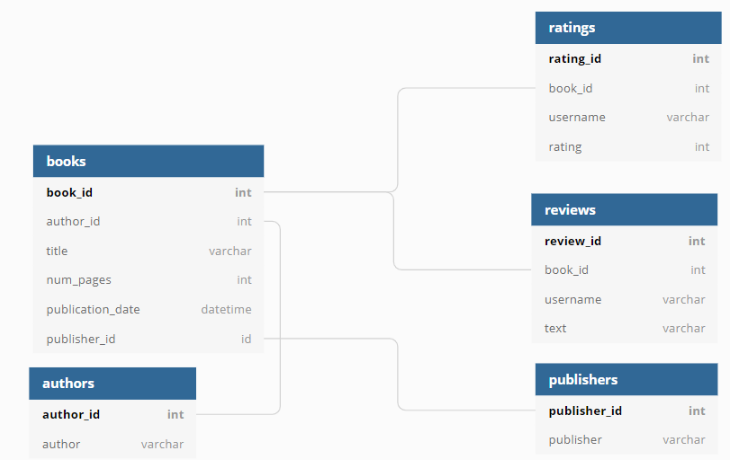

**Задачи:**
* Посчитать, сколько книг вышло после 1 января 2000 года;
* Для каждой книги посчитать количество обзоров и среднюю оценку;
* Определить издательство, которое выпустило наибольшее число книг толще 50 страниц;
* Определить автора с самой высокой средней оценкой книг;
* Посчитайть среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

# Загрузка данных

Подключимся к базе данных и исследуем таблицы, выведя их первые строки.

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
 'pwd': 'Sdf4$2;d-d30pp', # пароль
 'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
 'port': 6432, # порт подключения
 'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

def sql_result(query):
    return pd.io.sql.read_sql(query, con = engine)

Таблица `books` - cодержит данные о книгах:

In [3]:
query = '''\
SELECT *
FROM books
LIMIT 5
'''

sql_result(query)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


Таблица `authors` - cодержит данные об авторах:

In [4]:
query = '''\
SELECT *
FROM authors
LIMIT 5
'''

sql_result(query)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


Таблица `publishers` - cодержит данные об издательствах:

In [5]:
query = '''\
SELECT *
FROM publishers
LIMIT 5
'''

sql_result(query)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


Таблица `ratings` - cодержит данные о пользовательских оценках книг:

In [6]:
query = '''\
SELECT *
FROM ratings
LIMIT 5
'''

sql_result(query)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


Таблица `reviews` - cодержит данные о пользовательских обзорах:

In [7]:
query = '''\
SELECT *
FROM reviews
LIMIT 5
'''

sql_result(query)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


# Количество книг, вышедших после 1 января 2000 года;

In [8]:
query = '''\
SELECT COUNT(book_id) AS book_count
FROM books
WHERE publication_date > '2000-01-01'
'''

sql_result(query)

,book_count
0,819


# Количество обзоров и средняя оценка

In [9]:
query = '''\
SELECT books.title,
       books.book_id,
       COUNT(DISTINCT review_id) AS review_count,
       AVG(rating) AS avg_rating
FROM books
LEFT JOIN reviews ON reviews.book_id = books.book_id
LEFT JOIN ratings ON ratings.book_id = books.book_id
GROUP BY books.book_id
ORDER BY COUNT(reviews.review_id) DESC 
'''

sql_result(query)

,title,book_id,review_count,avg_rating
0,Twilight (Twilight #1),948,7,3.662500
1,The Hobbit or There and Back Again,750,6,4.125000
2,The Catcher in the Rye,673,6,3.825581
3,Harry Potter and the Prisoner of Azkaban (Harr...,302,6,4.414634
4,Harry Potter and the Chamber of Secrets (Harry...,299,6,4.287500
...,...,...,...,...
995,Essential Tales and Poems,221,0,4.000000
996,Leonardo's Notebooks,387,0,4.000000
997,The Cat in the Hat and Other Dr. Seuss Favorites,672,0,5.000000
998,Anne Rice's The Vampire Lestat: A Graphic Novel,83,0,3.666667


# Издательства, выпустившее наибольшее число книг толще 50 страниц

In [10]:
query = '''\
SELECT publisher,
       COUNT(book_id) AS book_count
FROM books
LEFT JOIN publishers ON publishers.publisher_id=books.publisher_id
WHERE num_pages>50
GROUP BY publisher
ORDER BY book_count DESC
LIMIT 1
'''

sql_result(query)

,publisher,book_count
0,Penguin Books,42


# Автор с самой высокой средней оценкой книг

In [11]:
query = '''\
WITH DATA AS
  (SELECT a.author,
          r.book_id,
          COUNT(rating) AS count_rating,
          AVG(rating) AS avg_rating
   FROM ratings r
   LEFT JOIN books b ON r.book_id = b.book_id
   LEFT JOIN authors a ON b.author_id = a.author_id
   GROUP BY a.author,
            r.book_id
   HAVING COUNT(rating) > 50)
   
SELECT author,
       AVG(avg_rating) AS avg_rating
FROM DATA
GROUP BY author
ORDER BY avg_rating DESC
LIMIT 1
'''

sql_result(query)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.283844


# Cреднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [12]:
query = '''\
SELECT AVG(review_count) AS avg_review_count
FROM
  (SELECT COUNT(review_id) AS review_count
   FROM reviews
   WHERE username IN
       (SELECT username
        FROM ratings
        GROUP BY username
        HAVING COUNT(ratings) > 50)
   GROUP BY username) AS sub_review_cnt
'''

sql_result(query)

,avg_review_count
0,24.333333


# Вывод

* После 1 января 2000 года вышло `819 книг`
* Максимальное количество обзоров вышло на книгу `Twilight (Twilight #1)` - 7 шт., рейтинг книги - 3.66
* Наибольшее количество книг выпустило издательство `Penguin Books`
* Самый высокооцененный автор - `J.K. Rowling/Mary GrandPré` с рейтингом 4.28
* Среднее количество обзоров от пользователей, которые поставили больше 50 оценок: 24.3.